# Segnale Cherenkov PMT di Readout

In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


In [25]:
fileROOT = root.TFile('../Cher/cherenkov.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

nDat = 1024*4 #numero dati per evento
nEvts = 10 #numero di eventi
n = 1024
#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1


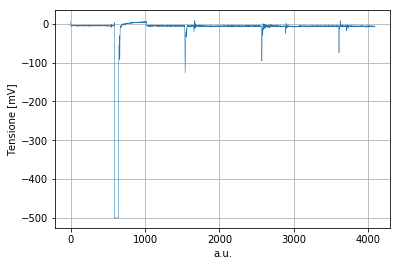

In [27]:
plt.plot(wave[5] , linewidth = .5)#stampo il 7mo evento
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

In [28]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((10, 1024), 1024)


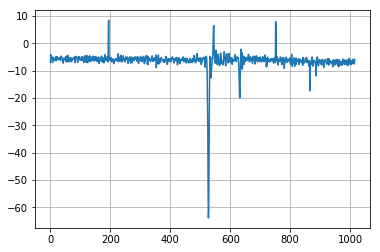

(0, 8)


In [29]:
plt.plot(timeCh4[7] , waveCh4[7])#il dato 70 sfancula all'inizio
plt.grid()
#plt.xlim(0,3)
plt.show()
j= 0
for i in range(nEvts):
    if min(waveCh4[i]) < -110 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j , 8)
#waveCh4[70][:].argmin()
#print(waveCh4[70][1] , waveCh4[151][1])

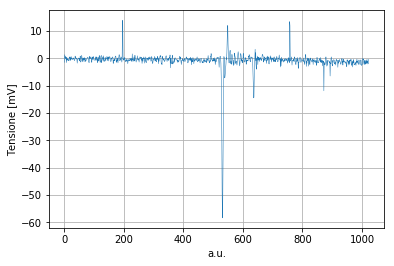

In [30]:
#creo un array per salvare i valori medi di tensione di piedistallo
meanPedestal = np.zeros((nEvts,1))

#scorro i dati e per ciascun evento seleziono una zona pre-segnale di cui faccio la media
#riscrivo quindi i dati scalandoli della media di piedistallo
for i in range(nEvts):
    waveCh4[i] = waveCh4[i]-np.mean(waveCh4[i][100:200])
    
#stampo la forma d'onda riscalata
plt.plot(waveCh4[7] , linewidth = 0.5)
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

6


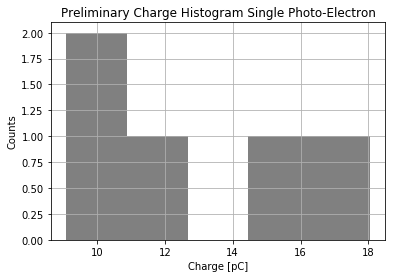

In [35]:
waveCh4A = np.zeros((nEvts,n))
R = 50 #resistenza in Ohm

j=0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        #seleziono solo gli eventi che hanno picchi sotto i 50mV (è una prova)
        if min(waveCh4[i]) >= -100: 
            waveCh4A[j] = waveCh4[i]/R #conversione dati Tensione -> dati Corrente
            j = j+1
    else: 1 
        #print(min(waveCh4[i]) , waveCh4[i].argmin() , i) #check
        
        
print(j+1)#check
integral = np.zeros(j)
#Eseguo l'Integrale
for i in range(j):
    integral[i] = sum(-waveCh4A[i])

#Istogramma di Carica    
plt.title('Preliminary Charge Histogram Single Photo-Electron')
plt.ylabel('Counts')
plt.xlabel('Charge [pC]')
plt.hist(integral , bins=5 , color = 'grey')
plt.grid()
#plt.xticks(np.arange(min(integral),max(integral)+1, 5))
#plt.savefig('../Grafici/chargeHistSinglePhoto.png')
plt.show()